**Arrhythmia on ECG Classification using CNN**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv("D:\ROSA\Coolyeah\Pengenalan Pola\Arhytmia-ECG-Classification\dataset\mitbih_train.csv", header=None)
test_df=pd.read_csv("D:\ROSA\Coolyeah\Pengenalan Pola\Arhytmia-ECG-Classification\dataset\mitbih_test.csv", header=None)

In [3]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


In [9]:
print(f"Number of Sample(train): {train_df.shape[0]}")
print(f"Number of categories(train): {train_df[187].nunique()}")

print("Class Distribution(train):")
print(train_df[187].value_counts())

Number of Sample(train): 87554
Number of categories(train): 5
Class Distribution(train):
187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


In [10]:
print(f"Number of Sample(test): {test_df.shape[0]}")
print(f"Number of categories(test): {test_df[187].nunique()}")

print("Class Distribution(test):")
print(test_df[187].value_counts())

Number of Sample(test): 21892
Number of categories(test): 5
Class Distribution(test):
187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


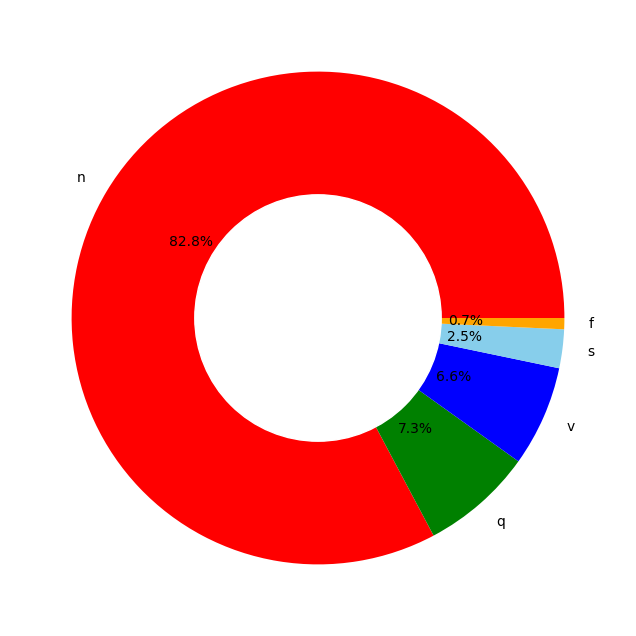

In [4]:
plt.figure(figsize=(15,8))
my_circle=plt.Circle((0,0), 0.5, color='white')
plt.pie(equilibre, labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Resampling**

In [5]:
#Upsampling dataset MIT-BIH untuk menyeimbangkan jumlah sampel dalam dataset
from sklearn.utils import resample

df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]
df_0 = (train_df[train_df[187] == 0].sample(n=20000, random_state=42))

#Upsampling 
df_1_upsample = resample(df_1, replace=True, n_samples=20000, random_state=123)
df_2_upsample = resample(df_2, replace=True, n_samples=20000, random_state=124)
df_3_upsample = resample(df_3, replace=True, n_samples=20000, random_state=125)
df_4_upsample = resample(df_4, replace=True, n_samples=20000, random_state=126)

train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [6]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


In [7]:
c=train_df.groupby(187, group_keys=False).apply(lambda train_df:train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
72403,0.986689,1.000000,0.745424,0.214642,0.038270,0.066556,0.116473,0.109817,0.188020,0.359401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74450,0.000000,0.136223,0.306502,0.352941,0.492260,0.575851,0.628483,0.708978,0.718266,0.746130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76207,1.000000,0.961818,0.749091,0.490909,0.327273,0.212727,0.167273,0.118182,0.116364,0.118182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80827,1.000000,0.914931,0.602431,0.204861,0.000000,0.076389,0.173611,0.164931,0.147569,0.154514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
81236,1.000000,0.476744,0.500000,0.515504,0.519380,0.507752,0.511628,0.496124,0.403101,0.294574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


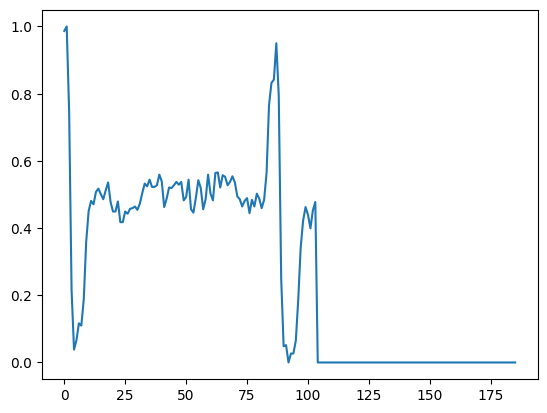

In [8]:
plt.plot(c.iloc[0, :186])

In [9]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


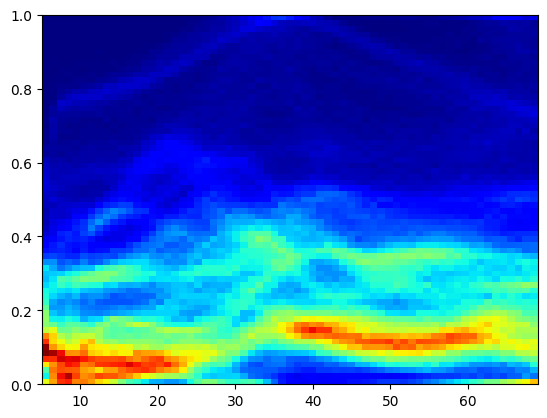

In [10]:
plot_hist(0, 70, 5, 65)

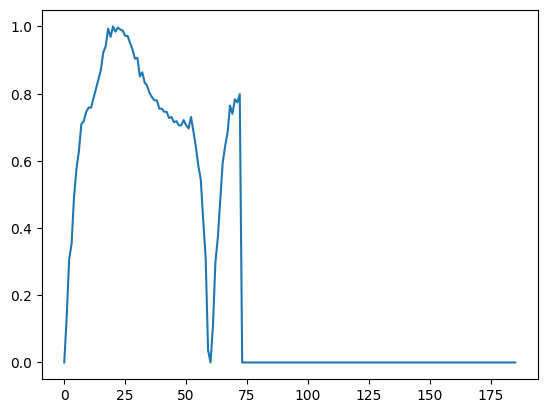

In [11]:
plt.plot(c.iloc[1,:186])

900000
900000


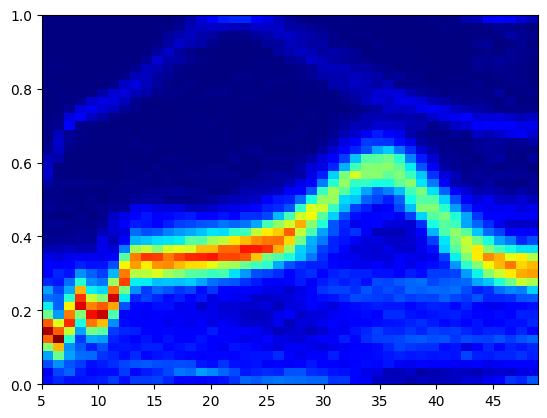

In [12]:
plot_hist(1,50,5,45)

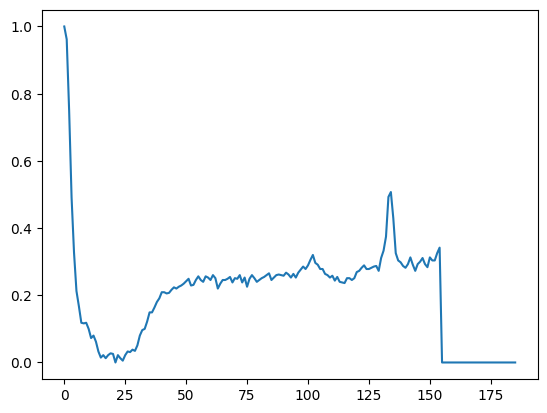

In [13]:
 plt.plot(c.iloc[2,:186])

900000
900000


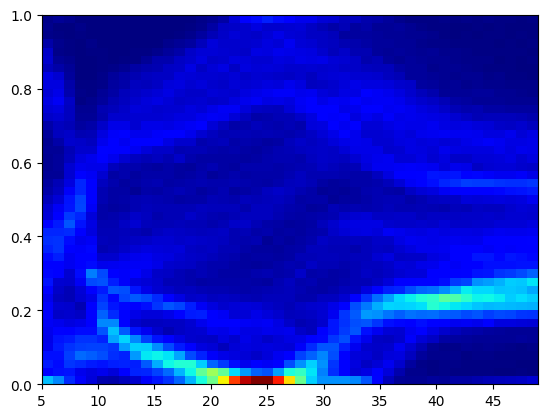

In [14]:
plot_hist(2,50,5,45)

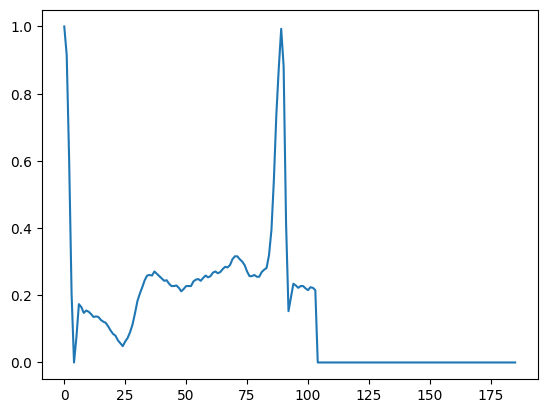

In [15]:
plt.plot(c.iloc[3,:186])

900000
900000


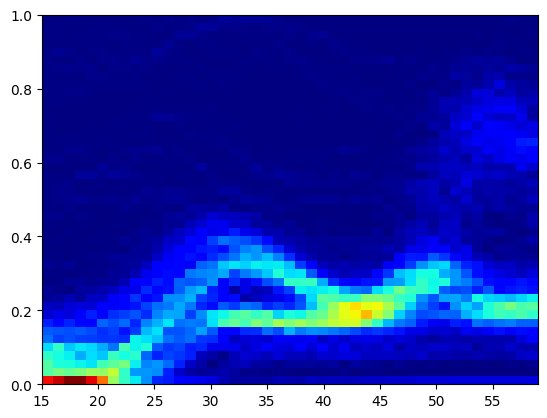

In [16]:
plot_hist(3,60,15,45)

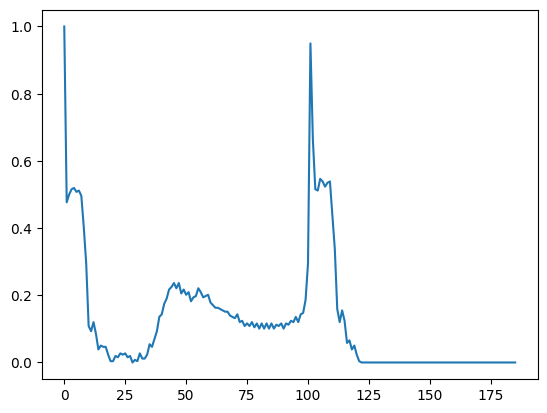

In [17]:
plt.plot(c.iloc[4,:186])

700000
700000


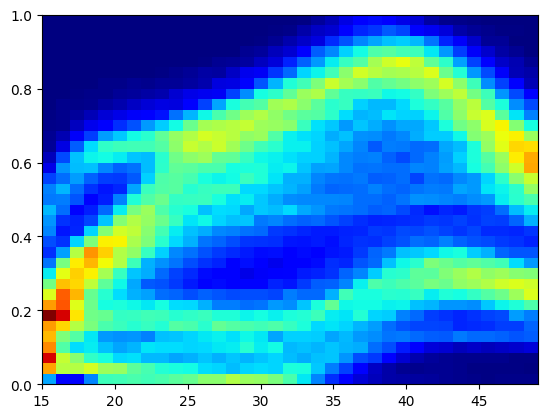

In [18]:
plot_hist(4,50,15,35)

**Penambahan Noise :** 
Penambahan noise berfungsi untuk mengeneralisasi data training 

In [19]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return(signal+noise)

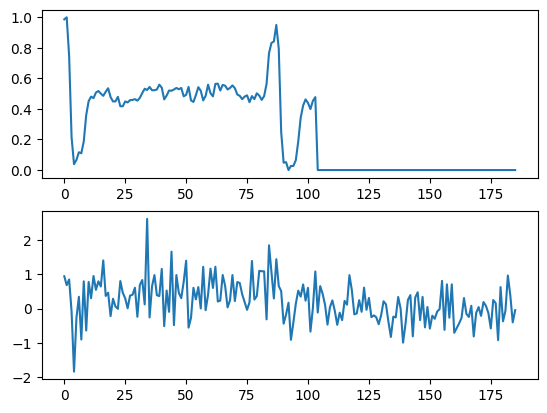

In [20]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [48]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [49]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

**Network**

In [50]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

**Evaluate**

In [51]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [53]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3122/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6065 - loss: 1.0020

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 63s 19ms/step - accuracy: 0.6066 - loss: 1.0019 - val_accuracy: 0.7200 - val_loss: 0.8235
Epoch 2/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 59s 19ms/step - accuracy: 0.6909 - loss: 0.8066 - val_accuracy: 0.7991 - val_loss: 0.8269
Epoch 3/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - accuracy: 0.7106 - loss: 0.7619 - val_accuracy: 0.3103 - val_loss: 1.2587
Epoch 4/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.7215 - loss: 0.7346 - val_accuracy: 0.6805 - val_loss: 0.8465
Epoch 5/40
3122/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7310 - loss: 0.7088

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 132s 24ms/step - accuracy: 0.7310 - loss: 0.7088 - val_accuracy: 0.7123 - val_loss: 0.7794
Epoch 6/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.7403 - loss: 0.6857 - val_accuracy: 0.6195 - val_loss: 0.9052
Epoch 7/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 88s 28ms/step - accuracy: 0.7504 - loss: 0.6576 - val_accuracy: 0.6953 - val_loss: 0.7837
Epoch 8/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.7630 - loss: 0.6258 - val_accuracy: 0.7067 - val_loss: 0.7940
Epoch 9/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7747 - loss: 0.5973

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 76s 24ms/step - accuracy: 0.7747 - loss: 0.5973 - val_accuracy: 0.6919 - val_loss: 0.7789
Epoch 10/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 73s 23ms/step - accuracy: 0.7842 - loss: 0.5720 - val_accuracy: 0.6220 - val_loss: 0.8295
Epoch 11/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 63s 20ms/step - accuracy: 0.7994 - loss: 0.5358 - val_accuracy: 0.6552 - val_loss: 0.8817
Epoch 12/40
3124/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8115 - loss: 0.5048

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.8115 - loss: 0.5048 - val_accuracy: 0.7678 - val_loss: 0.6663
Epoch 13/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.8215 - loss: 0.4780 - val_accuracy: 0.5044 - val_loss: 1.1085
Epoch 14/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 63s 20ms/step - accuracy: 0.8314 - loss: 0.4523 - val_accuracy: 0.6415 - val_loss: 0.9074
Epoch 15/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - accuracy: 0.8385 - loss: 0.4340 - val_accuracy: 0.6569 - val_loss: 0.8845
Epoch 16/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - accuracy: 0.8453 - loss: 0.4112 - val_accuracy: 0.6258 - val_loss: 0.9898
Epoch 17/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 58s 19ms/step - accuracy: 0.8552 - loss: 0.3901 - val_accuracy: 0.6048 - val_loss: 1.0100
Epoch 18/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 60s 19ms/step - accuracy: 0.8645 - loss: 0.3650 - val_accuracy: 0.6036 - val_loss: 0.9887
Epoch 19/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 60s 19ms/step - accuracy: 0.8705 - los

Accuracy: 76.78%


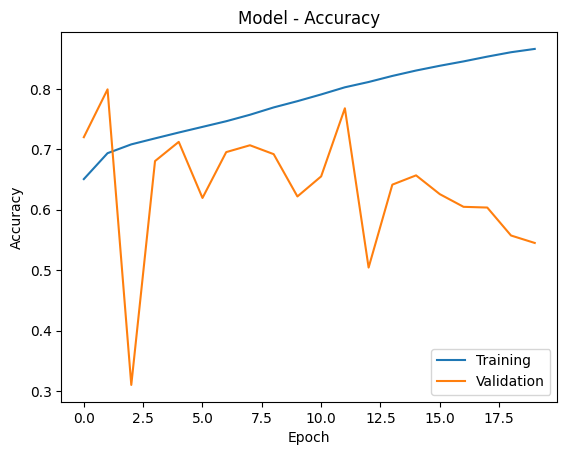

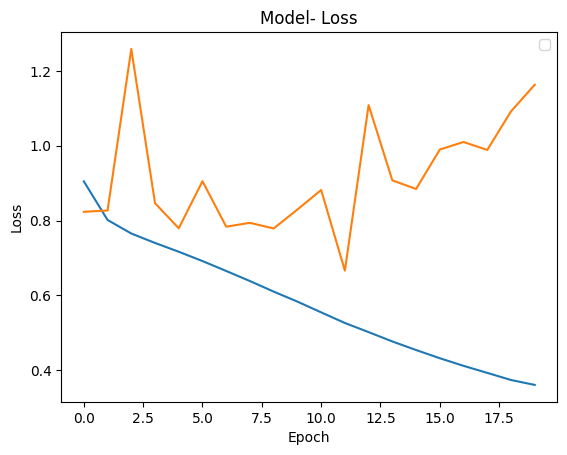

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [54]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


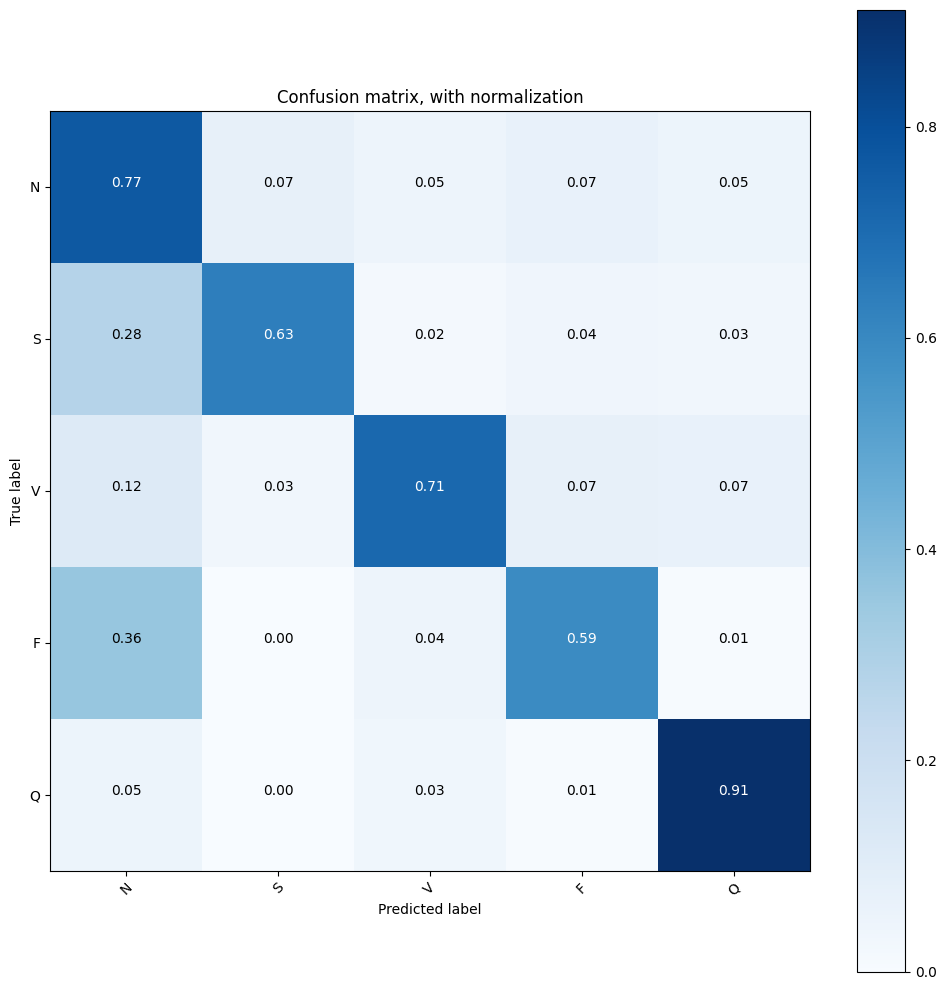

In [55]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()